In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

import hvplot.networkx as hvnx
import holoviews as hv

# Marvel Cinematic Universe 

I'm using the marvel character dataset from http://mozart.diei.unipg.it/gdcontest/contest2019/topics.html

> The graph is provided in GraphML format. Each node has a data key type that describes whether it corresponds to a hero or to a movie, and a data key name that contains the name of the hero or the title of the movie. There is an edge between a hero-node and a movie-node if the hero appeared in the corresponding movie.

Reading in the data and taking a initial look at it:

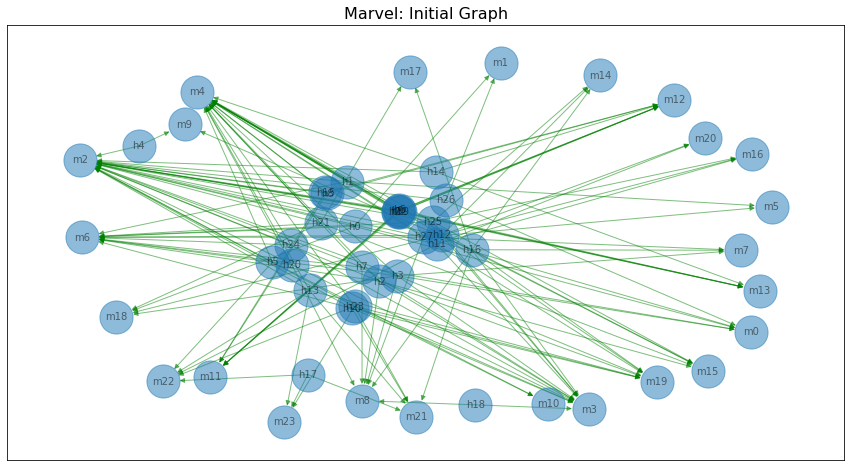

In [170]:
G = nx.read_graphml("marvel-graph.graphml")

#pos = nx.layout.spring_layout(G, k=1, iterations=100, seed=1)
pos = nx.layout.spring_layout(G)

fig, ax = plt.subplots(figsize=(15,8))
ax.set_title("Marvel: Initial Graph", fontsize=16)

nx.draw_networkx(G, pos, ax=ax, font_size=10,
                 node_size=1100, alpha=0.5, edge_color="g");

## 2. Processing the data

### 2.1 Seperating heroes and movies

Now I want to seperate the hero and movie nodes so they look different, as in the initial graph its not each to make out whats what.


In [284]:
degrees = dict(G.degree)
hero_node_size = [v * 400 for k, v in degrees.items() if k.startswith('h')]
movie_node_size = [v * 400 for k, v in degrees.items() if k.startswith('m')]

movie_nodes = []
hero_nodes = []
hero_names = dict()
movie_names = dict()
names = dict()

for node in G.nodes:
    t = G.nodes[node]['type']
    name = G.nodes[node]['name']
    
    if t == 'hero':
        hero_nodes.append(node)
        hero_names[node] = name
    elif t == 'movie':
        movie_nodes.append(node)
        movie_names[node] = name
        
    names[node] = name
    
print(f"Num Movies: {len(movies)}, Num heroes: {len(heroes)}, Total: {len(names)}")

Num Movies: 24, Num heroes: 28, Total: 52


## 3. Drawing

### 3.1 Spring layout improved

First, calculating positions:

In [306]:
pos_spring = nx.layout.spring_layout(G, k=3, iterations=200, seed=1)

Drawing:

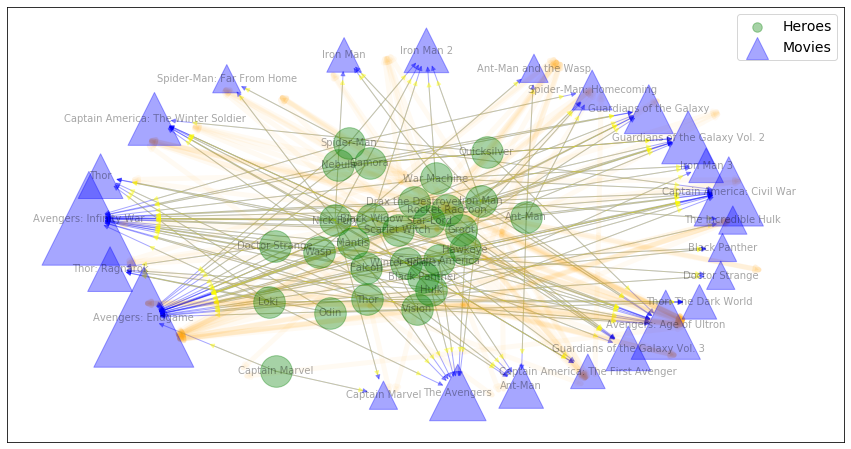

In [312]:
fig, ax = plt.subplots(figsize=(15,8))

# heroes
nx.draw_networkx(G, pos_spring, ax=ax, 
                 font_size=10, nodelist=hero_nodes, labels=hero_names, label="Heroes",
                 node_size=1000, alpha=0.35, edge_color="blue", node_color="green")

# movies
nx.draw_networkx(G, pos_spring, 
                 ax=ax, font_size=10, nodelist=movie_nodes, labels=movie_names, label="Movies",
                 node_shape='^',
                 node_size=movie_node_size, alpha=0.35, edge_color="yellow", node_color="blue")

# highlighting egdes by giving them an organge background
nx.draw_networkx_edges(G, pos, alpha=0.05, edge_color='orange', width=5)

ax.legend(fontsize=14, markerscale=0.3, fancybox=True);

### 3.2 bipartite layout

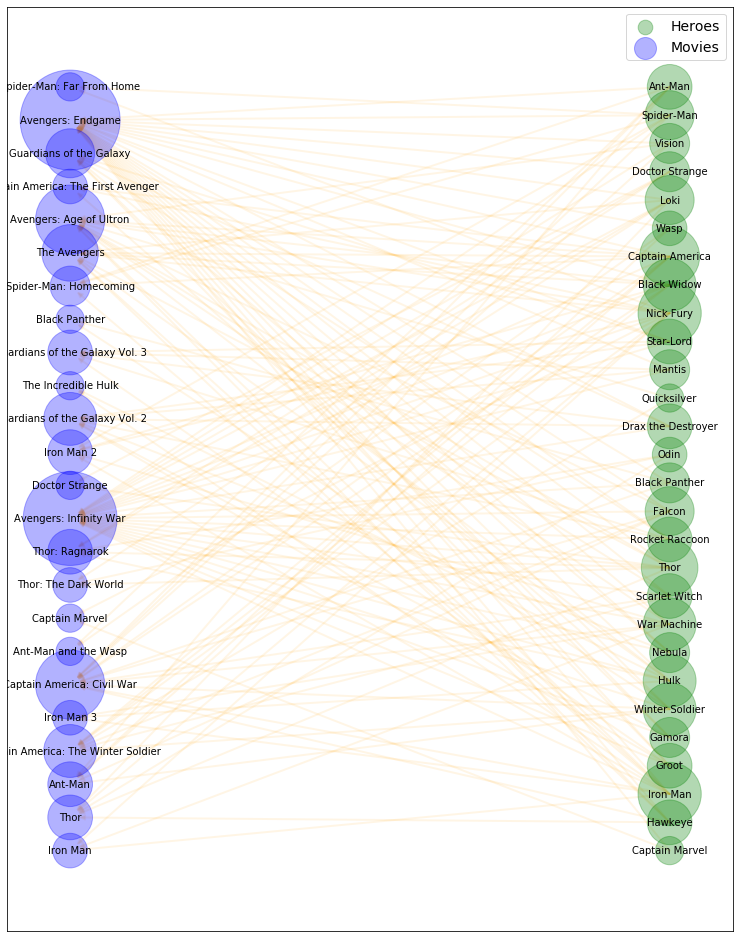

In [261]:
pos = nx.layout.spring_layout(G, k=6, iterations=190, seed=1)
#pos = nx.layout.circular_layout(G)
pos = nx.layout.bipartite_layout(G, nodes=movie_nodes, align='vertical')

fig, ax = plt.subplots(figsize=(13,17))
#ax.set_title("Marvel: Seperating Movies and Heroes")

# drawing hero nodes
nx.draw_networkx_nodes(G, pos, nodelist=hero_nodes, ax=ax, labels=names, font_size=10, label="Heroes",
                       node_size=hero_node_size,
                       node_shape='o', node_color='green', alpha=0.3, )

# movie graph
nx.draw_networkx_nodes(G, pos, nodelist=movie_nodes, ax=ax, labels=names, font_size=14,
                       node_size=movie_node_size, label="Movies", 
                       node_shape='o', node_color='b', alpha=0.3, name="dssssss")

# egdes
nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='orange', width=2)

nx.draw_networkx_labels(G, pos, labels=names, font_size=10, font_color="k")
ax.legend(fontsize=14, markerscale=0.3, fancybox=True);

## Interactive drawings

In [356]:
pos = nx.layout.spring_layout(G, k=6, iterations=190, seed=1)
#pos = nx.layout.circular_layout(G)
#pos = nx.layout.bipartite_layout(G, nodes=movie_nodes, align='vertical')

options = {
    'node_color': 'blue',
    'node_size': 500,
    'width': 800,
    'height': 600,
    'apha': 0.6,
    'edge_color': 'orange',
    'edge_width': 0.6,
    'labels': 'name'
}

hvnx.draw_networkx(G, pos, **options)

:Overlay
   .Graph.I  :Graph   [start,end]
   .Labels.I :Labels   [x,y]   (name)

The below code should work, but there is a but in holoviews and it fails to deal with nodelist

In [359]:
hvnx.draw_networkx_nodes(G, pos, nodelist=movie_nodes, node_size=movie_node_size, node_color='blue')

ValueError: Length of values does not match length of index